# Estimating Jupiter's Boundaries
This notebook includes some basic usage examples for estimating the locations of Jupiter's magnetospheric boundaries. Given any combination of three of the:
- x position (x) in units of Jupiter Radii (RJ) and referenced to the Jupiter-Sun-de-Spun (JSS) coordinate system,
- y position (y) in RJ and referenced to JSS
- z position (z) in RJ and referenced to JSS
- solar wind dynamic pressure (p_sw) in nPa
the fourth variable may be estimated.

## Getting Started
This project is not (yet!) available as a package, which means it cannot be downloaded or accesed via the usual commands (i.e., `pip install ...` or `import ...`).
For the time being, it can instead be downloaded and imported by using the `sys` package to add the download path to your PYTHONPATH

In [1]:
import sys
# Replace this line with the location of the file:
path_to_file = '/Users/mrutala/projects/JovianBoundaries/code/'
sys.path.append(path_to_file)

from find_Boundary import find_Boundary

import numpy as np
import matplotlib.pyplot as plt
import tqdm

Now that we've imported it, we can find a description of the arguments `find_Boundary` takes by running

In [2]:
find_Boundary()


    This function takes 3 of (x, y, z, p_sw) and estimates the 4th,
    beginning the search at 'guess'

    Parameters
    ----------
    boundary : str
        A string defining the boundary of interest. 
        By default, the magnetopause.
    x : floatlike or bool, optional
        JSS x-coordinate of the point of interest.
        Leave out or set to TRUE to estimate x.
    y : floatlike or bool, optional
        JSS y-coordinate of the point of interest.
        Leave out or set to TRUE to estimate y.
    z : floatlike or bool, optional
        JSS z-coordinate of the point of interest.
        Leave out or set to TRUE to estimate z.
    p_sw : floatlike or bool, optional
        Solar wind (dynamic) pressure at the point of interest.
        Leave out or set to TRUE to estimate p_sw.
    guess : floatlike, optional
        Initial guess for estimating the result. The boundary functions are
        typically double-valued; the value closest to initial guess will be 
        re

### Example 1: Estimating the sub-solar standoff distance of the magnetopause
The sub-solar standoff distance, or 'nose', of the magnetopause, is measured along the Sun-Jupiter line where $y = z = 0 \ R_J$. The sub-solar standoff distance can thus be estimated for $p_{sw} = 0.07$ nPa as:

In [3]:
boundary = 'magnetopause'
y = z = 0 # in R_J
p_sw = 0.07 # in nPa
x_mean, x_std = find_Boundary(boundary, x = True, y = y, z = z, p_sw = p_sw, guess = 100)

result_str = r"The subsolar standoff distance of the magnetopause for p_SW = {0:.1f} nPa is x_JSS = {1:.1f} +/- {2:.1f} R_J" 
print(result_str.format(p_sw, x_mean, x_std))

The subsolar standoff distance of the magnetopause for p_SW = 0.1 nPa is x_JSS = 66.0 +/- 25.7 R_J


/Users/mrutala/projects/JovianBoundaries/code/find_Boundary.py:132: RuntimeWarning: divide by zero encountered in divide
  r_b = r_ss * (2/(1 + np.cos(X[0])))**alpha_f + r_b_prime
/Users/mrutala/projects/JovianBoundaries/code/find_Boundary.py:134: RuntimeWarning: invalid value encountered in add
  r_b = r_b + (sigma[0] + sigma[1]*r_b)*gauss_factor
/Users/mrutala/projects/JovianBoundaries/code/find_Boundary.py:143: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solutions = fsolve(minimization, np.full(n, guess))


### Example 2: Estimating the magnetopause response to changing solar wind
If we instead wanted to see how the sub-solar standoff distance of the magnetopause chanes as pressure changes, we can do the same steps within a loop as:

In [4]:
# Generate an array of pressures
p_sw_arr = np.logspace(-3, 1, 100) # 100 pressures, ranging from 0.001 nPa to 10 nPa

# Plug each pressure into find_Boundary(), giving progress updates with tqdm
x_mean_arr = np.zeros(100)
x_std_arr = np.zeros(100)
for i, p_sw in tqdm.tqdm(enumerate(p_sw_arr), total=100):
    x_mean_arr[i], x_std_arr[i] = find_Boundary(boundary, x = True, y = y, z = z, p_sw = p_sw, guess = 60)

100%|██████████| 100/100 [00:23<00:00,  4.20it/s]


[Text(0.5, 0, '$p_{SW}$ [nPa]'),
 None,
 Text(0, 0.5, 'Magnetopause Standoff Distance [$R_J$]')]

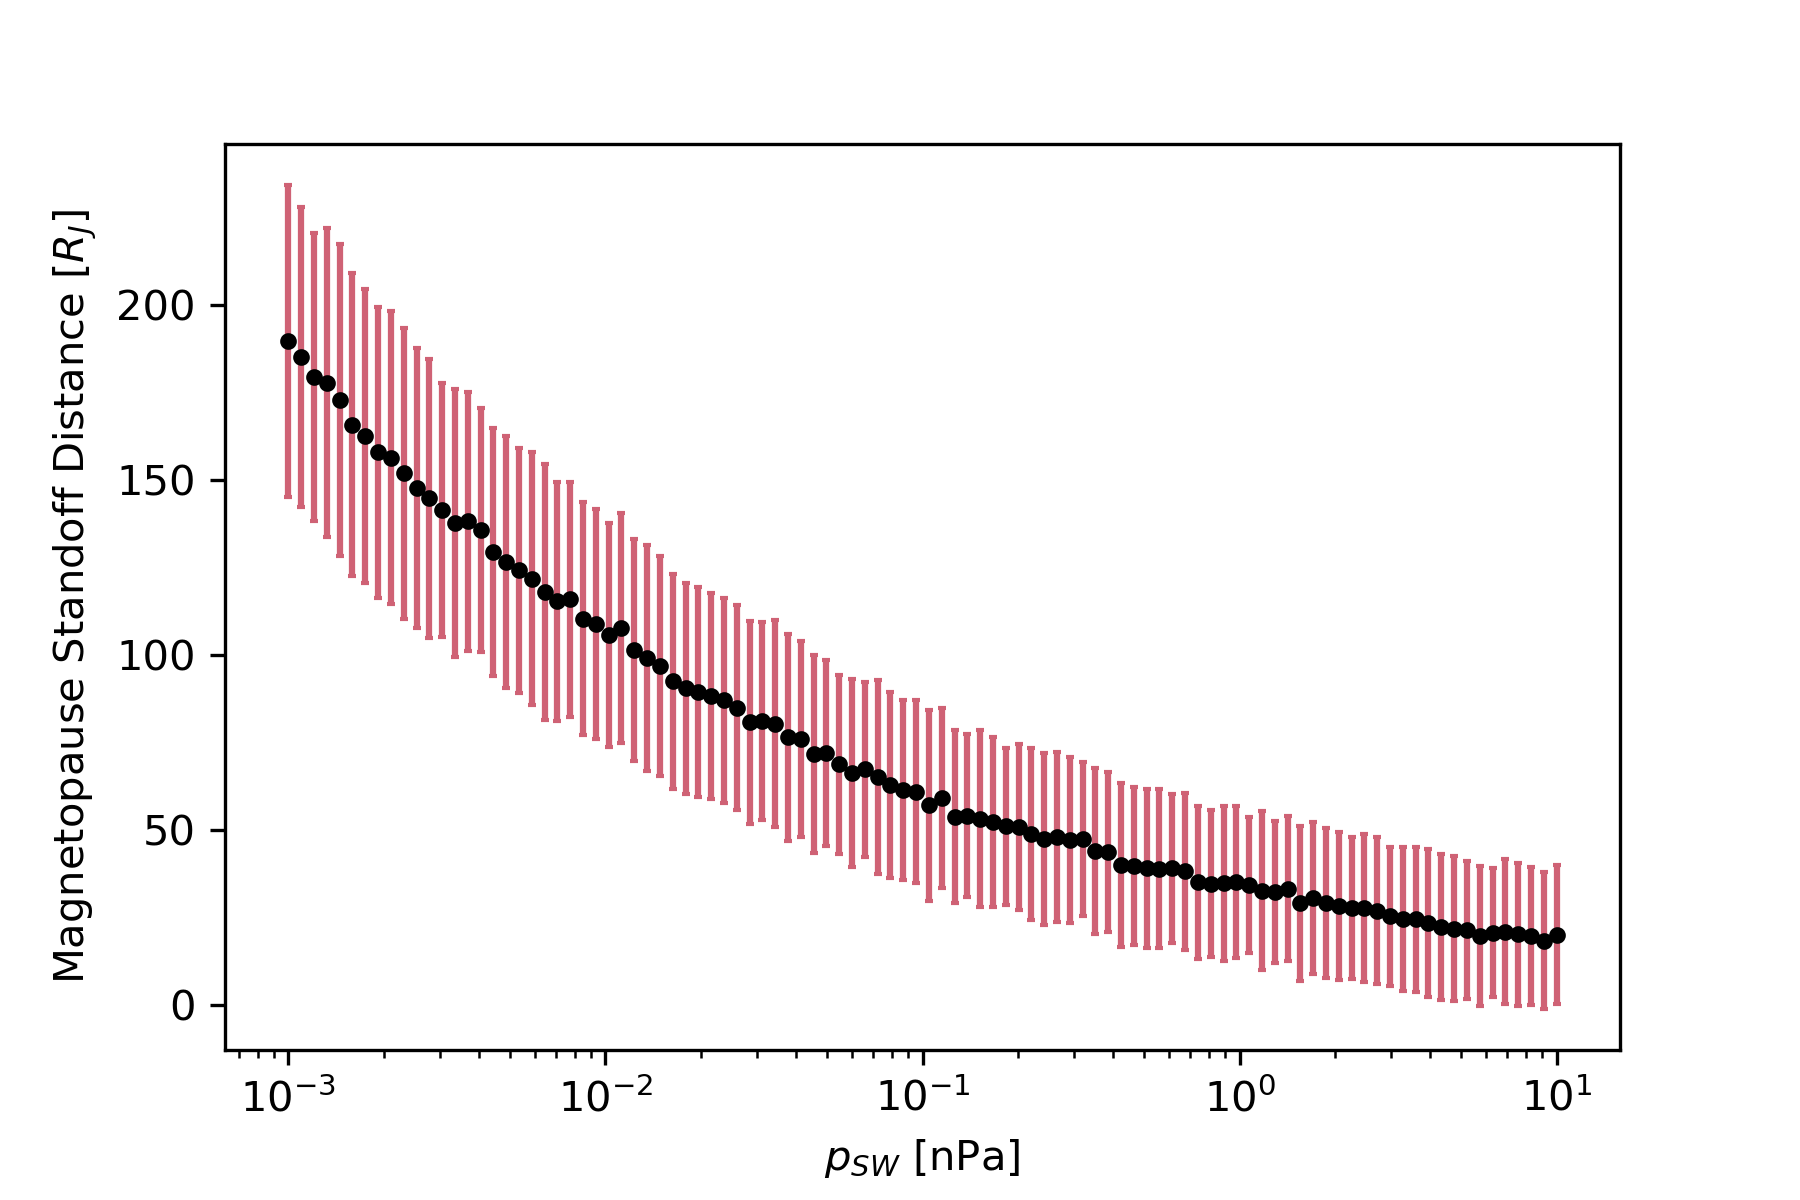

In [14]:
# Plot the results
fig, ax = plt.subplots()
ax.errorbar(p_sw_arr, x_mean_arr, x_std_arr,
           marker ='o', markersize=3, color='black', linestyle='None',
           ecolor='xkcd:rose', capsize=1)
ax.set(xlabel = r"$p_{SW}$ [nPa]", xscale='log',
       ylabel = r"Magnetopause Standoff Distance [$R_J$]")